# Convolutional Neural Network

## CNNs for hand-written digit (MNIST) classification

**CNNs, by preserving the locality of the pixels, find much better features in the images to predict from than NNs.**

Start GPU. Should say "Found GPU ..."

In [1]:
import tensorflow as tf  
                      
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
import numpy as np  
np.random.seed(123)  
import tensorflow as tf  

from keras.models import Sequential, load_model, clone_model
from keras.layers import Dense, Dropout, Activation, Flatten 
from keras.layers import Conv2D, MaxPooling2D  
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint 
from keras.datasets import mnist

from matplotlib import pyplot as plt

In [3]:
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape) 
print(y_train.shape) 
print(X_test.shape)  
print(y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Data pre-processing

In [4]:
# reshape for single grey channel
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) 
input_shape = (28, 28, 1) 

X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [5]:
# normalise from 0 to 1
X_train = X_train.astype('float32')
X_train /= 255 

X_test = X_test.astype('float32')
X_test /= 255

In [6]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
print(y_train.shape)
Y_train = np_utils.to_categorical(y_train, 10)
print(Y_train.shape)

Y_test = np_utils.to_categorical(y_test, 10)

(60000,)
(60000, 10)


### Define the CNN model


In [7]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # 32 filters of size 3x3, then ReLu the output
print(model.output_shape)

model.add(Conv2D(32, (3, 3), activation='relu')) 
print(model.output_shape)

model.add(MaxPooling2D(pool_size=(2,2))) # Down-sample in boxes of size 2x2 with no-overlap. Allows for some translation invariance in the image.
print(model.output_shape)

model.add(Flatten()) # Convert to one long vector that represents the image in terms of the learned features
print(model.output_shape)

model.add(Dense(128, activation='relu')) # The thinking (fully-connected) layer. Learn the interactions between the extracted features and the desired output
print(model.output_shape)

model.add(Dense(10, activation='softmax')) # The dense layer with softmax activation to output 10 probabilities - one for each digit
print(model.output_shape)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary()) 

(None, 26, 26, 32)
(None, 24, 24, 32)
(None, 12, 12, 32)
(None, 4608)
(None, 128)
(None, 10)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 600,810
Trainab

### Train the CNN model
10 epochs and a batch size of 32

In [8]:
checkpointer = ModelCheckpoint('CNN-{epoch:02d}.hdf5', verbose = 1) # Temporarily save the model to our drive after each epoch, with the epoch number 
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1, callbacks=[checkpointer]) # Verbose = 1 shows the progress of the model training

Epoch 1/10
1875/1875 [==============================] - 11s 3ms/step - loss: 0.2596 - accuracy: 0.9219

Epoch 00001: saving model to CNN-01.hdf5
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0389 - accuracy: 0.9883

Epoch 00002: saving model to CNN-02.hdf5
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0230 - accuracy: 0.9931

Epoch 00003: saving model to CNN-03.hdf5
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0155 - accuracy: 0.9954

Epoch 00004: saving model to CNN-04.hdf5
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0117 - accuracy: 0.9958

Epoch 00005: saving model to CNN-05.hdf5
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0077 - accuracy: 0.9974

Epoch 00006: saving model to CNN-06.hdf5
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0060 - accuracy: 0.9980

Epoch 00007: saving model to CNN

### Test the CNN model

In [9]:
model_score = model.evaluate(X_test, Y_test, verbose = 1)
print('Test loss: ', model_score[0])
print('Test accuracy: ', model_score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0494 - accuracy: 0.9905
Test loss:  0.04937336966395378
Test accuracy:  0.9904999732971191


CNN model: 99% accuracy

### Redefine model (model2). More filters and dropout layers added. Optimiser changed

In [10]:
model2 = Sequential() 

model2.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))

model2.add(Conv2D(64, (3, 3), activation='relu'))

model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Dropout(0.25)) # reduce overfitting in the model, should help performance

model2.add(Flatten())

model2.add(Dense(128, activation='relu'))

model2.add(Dropout(0.5))

model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer='adadelta', # instead of 'adam'
              metrics=['accuracy'])

print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

### Train CNN model2
*12 epochs and a batch size of 128*

In [11]:
model2.fit(X_train, Y_train, batch_size=128, epochs=12, verbose=1)

Epoch 1/12
469/469 [==============================] - 3s 5ms/step - loss: 2.2883 - accuracy: 0.1338
Epoch 2/12
469/469 [==============================] - 2s 5ms/step - loss: 2.2429 - accuracy: 0.2555
Epoch 3/12
469/469 [==============================] - 2s 5ms/step - loss: 2.1794 - accuracy: 0.3717
Epoch 4/12
469/469 [==============================] - 2s 5ms/step - loss: 2.0939 - accuracy: 0.4470
Epoch 5/12
469/469 [==============================] - 2s 5ms/step - loss: 1.9812 - accuracy: 0.5051
Epoch 6/12
469/469 [==============================] - 2s 5ms/step - loss: 1.8431 - accuracy: 0.5437
Epoch 7/12
469/469 [==============================] - 2s 5ms/step - loss: 1.6803 - accuracy: 0.5826
Epoch 8/12
469/469 [==============================] - 2s 5ms/step - loss: 1.5177 - accuracy: 0.6119
Epoch 9/12
469/469 [==============================] - 2s 5ms/step - loss: 1.3641 - accuracy: 0.6399
Epoch 10/12
469/469 [==============================] - 2s 5ms/step - loss: 1.2255 - accuracy: 0.6687

### Test CNN model2

In [12]:
model2_score = model2.evaluate(X_test, Y_test, verbose = 1)
print('Test loss: ', model2_score[0])
print('Test accuracy: ', model2_score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.7770 - accuracy: 0.8305
Test loss:  0.7769657969474792
Test accuracy:  0.8305000066757202


CNN model2: 83% accuracy

# Classify an uploaded real image


In [16]:
# quick function to load an image, turn it to greyscale and resize it to 28x28

from PIL import Image
import PIL.ImageOps  # turn the image into a black number

def file_to_input(string):
  img  = Image.open(string) 
  width, height = img.size 
  area = (width/4, height/4, 3*width/4, 3*height/4) 
  img = img.crop(area) # crops to the middle of the image

  img = img.resize((28, 28)) # resize the image to 28x28
  img = img.convert('L') # turn to greyscale
  img = PIL.ImageOps.invert(img)

  pic = np.array(img)
  pic = pic/255
  # np.place(pic, pic < 0.5, 0) # these could possibly used to sharpen the images...
  # np.place(pic, pic > 0.5, 1)

  return pic

(28, 28)
2


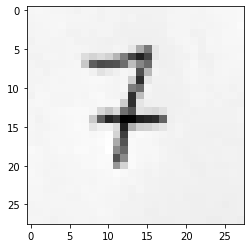

In [19]:
img1 = file_to_input('seven.jpg')
print(img1.shape)
plt.imshow(img1, cmap='Greys')
img1_reshape = img1.reshape(1,28,28,1)
result = model2.predict(img1_reshape)
print(np.argmax(result))

In [15]:
# Close out all the images we opened
#plt.close('all')
#Image.close('all')